## Oasis infobyte Internship
## Name : Sheema Masood 
## Data Science Internship
### OCTOBER 2024
------------------------------------------------------

## TASK 3 :  "SALES PREDICTION USING PYTHON:"

Sales prediction means predicting how much of a product people will buy based on
factors such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to
predict their future sales with every step they take to manipulate the cost of advertising their
product. 

So let’s start the task of sales prediction with machine learning using Python.

--------------------------------------------------------------------

## Sales Prediction Project

    1. Introduction
    2. Data Loading and Exploration
    3. Data Visualization and Analysis
    4. Data Preprocessing
    5. Model Selection and Training
    6. Model Evaluation
    7. Prediction and Interpretation
    8. Model Deployment (Optional)
    9. Conclusion
    10. References

## 1. Introduction

Sales prediction is a critical task for businesses as it helps in estimating future sales, optimizing inventory management, and strategizing marketing efforts. By leveraging machine learning techniques, businesses can forecast sales based on various factors like advertising expenditure, customer demographics, and platform performance.

### Objectives
The objective of this project is to build a predictive model that can accurately estimate future sales based on advertising data. We will explore the dataset, preprocess the data, train various machine learning models, and evaluate their performance to select the best model for predicting sales.

### Dataset Description
The dataset used for this project is `advertising.csv`, which contains data on different advertising channels (TV, Radio, Newspaper) and their corresponding sales figures. The dataset includes the following columns:
- **TV**: Advertising spend on TV in dollars
- **Radio**: Advertising spend on Radio in dollars
- **Newspaper**: Advertising spend on Newspaper in dollars
- **Sales**: Sales of the product in units

### Tools and Libraries
We will be using Python and the following libraries:
- **Pandas** for data manipulation
- **NumPy** for numerical computations
- **Matplotlib** and **Seaborn** for data visualization
- **Scikit-learn** for machine learning model building and evaluation

Let's dive into the project by first loading and exploring the dataset.

## IMPORT LIBRARIES

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

## 2. DATA LOADING & EXPLORATION
- **Initial Data Inspection**:Display the first few rows of the dataset using head().
- **Get a summary of the dataset** using info() to see the data types and non-null counts.
- **Use describe()** to get basic statistical insights like mean, min, max, and percentiles.
- **Check for Missing Values**:Identify any missing values in the dataset with isnull().sum().
- **Examine Data Types**Ensure that each column has the correct data type (e.g., numerical for sales and advertising spend).

In [5]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Get statistical summary of the dataset
print(df.shape)
df.describe()

(200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# its un named we have nothing to do with it
df.drop(columns = 'Unnamed: 0' ,inplace=True,axis=1)

In [9]:
# Check for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
# Check data types
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

------------------------------------------

## 3. DATA VISUALIZATION & ANALYSIS
1. **Univariate Analysis**:
    Plot the distribution of individual features like TV, Radio, Newspaper, and Sales to understand their distribution.

2. **Bivariate Analysis**:
    Analyze the relationship between each advertising channel (TV, Radio, Newspaper) and Sales.
    Scatter plots are effective for visualizing these relationships.

3. **Correlation Matrix and Heatmap**:
    Calculate the correlation matrix to see how features are correlated with each other.
    Visualize this matrix using a heatmap to easily identify strong correlations.

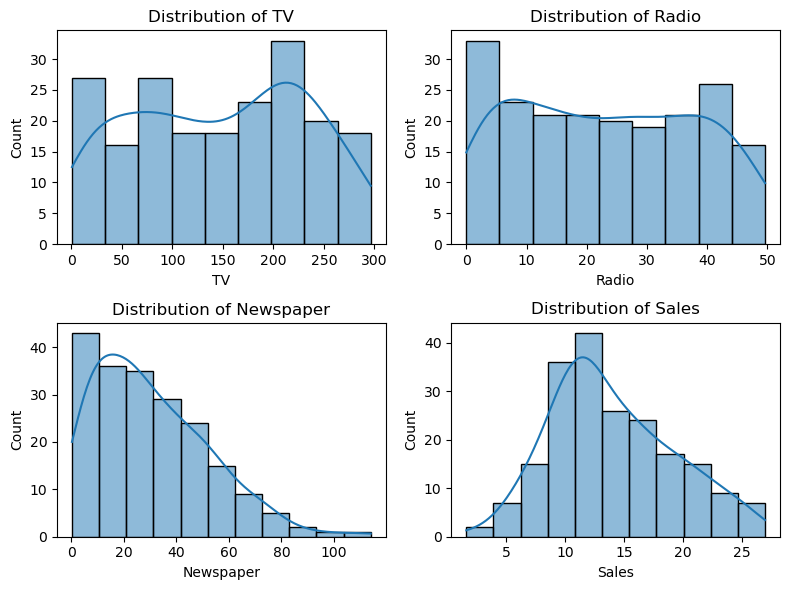

In [11]:
#Univariate Analysis with Loop
# List of features for univariate analysis
features = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(8, 6))

# Loop through features to create histograms
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.savefig("Distributions of features")
plt.tight_layout()
plt.show()


## **Insights from Univariate Analysis - Distribution of Advertising Spend**
The univariate analysis plots the distribution of individual features (TV, Radio, Newspaper) and sales. It helps identify patterns and outliers in advertising spending and sales performance. For instance, the TV advertising budget has a wide range, while Radio and Newspaper spend are relatively lower. The distribution of sales shows some variation, with most sales figures clustering between 10 and 20 units.


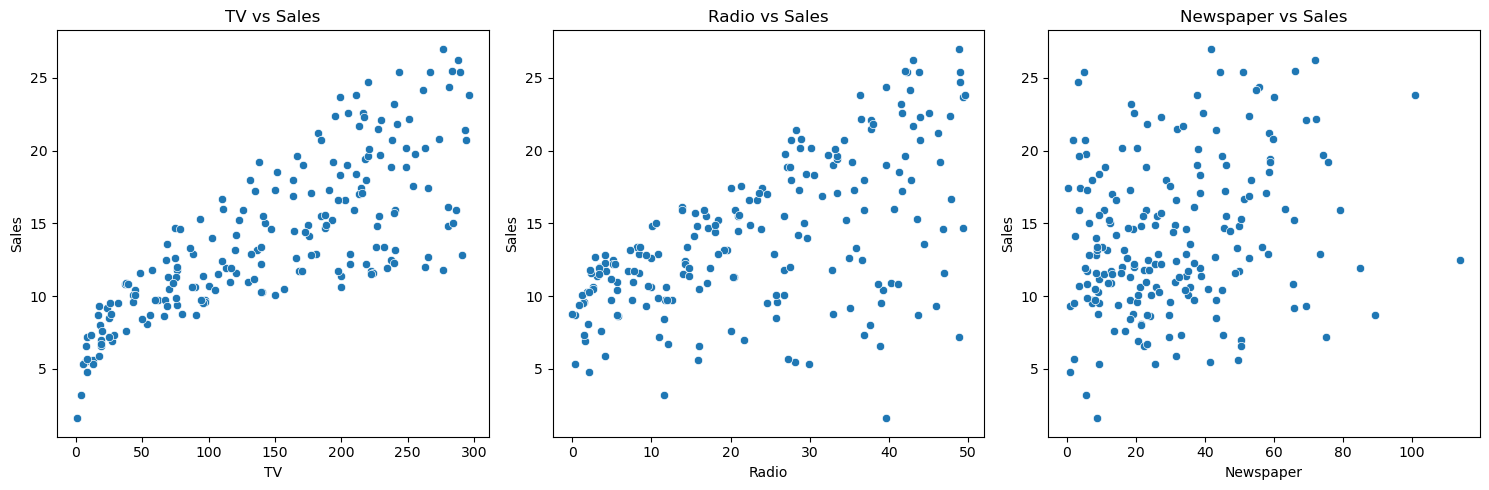

In [12]:
# Bivariate Analysis 
# List of features to compare with Sales
advertising_features = ['TV', 'Radio', 'Newspaper']

plt.figure(figsize=(15, 5))

# Loop through features to create scatter plots
for i, feature in enumerate(advertising_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=feature, y='Sales', data=df)
    plt.title(f'{feature} vs Sales')

plt.savefig("Features Vs Sales")
plt.tight_layout()
plt.show()


## **Insights from Bivariate Analysis - Sales vs Advertising Channels**
This analysis presents scatter plots of sales against different advertising channels (TV, Radio, Newspaper). From these visualizations, we observe:
   - **TV vs Sales**: A positive correlation, indicating higher TV advertising leads to increased sales.
   - **Radio vs Sales**: A moderate positive correlation, suggesting radio ads also influence sales.
   - **Newspaper vs Sales**: A weaker correlation, implying newspaper ads have a less significant impact on sales.


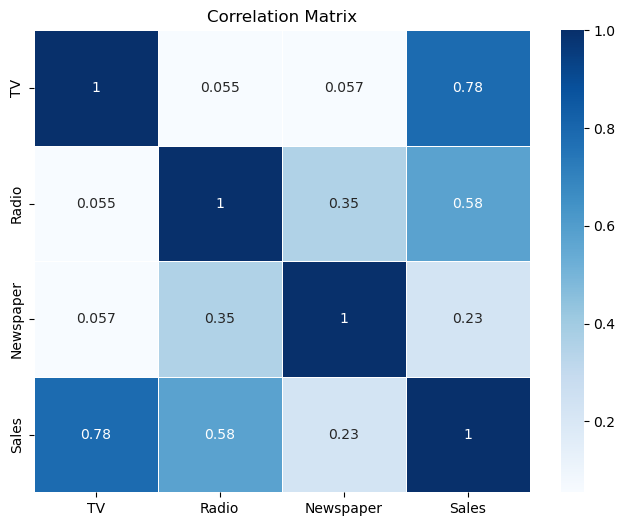

In [13]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("Correlation Matrix Between Features")
plt.show()


## **Correlation Matrix & Heatmap**
The correlation matrix and heatmap visualize the relationships between the features. TV and sales exhibit a strong positive correlation, while Radio and Newspaper show lower correlations. This helps in determining which advertising channels are more effective in driving sales, guiding future budget allocation.


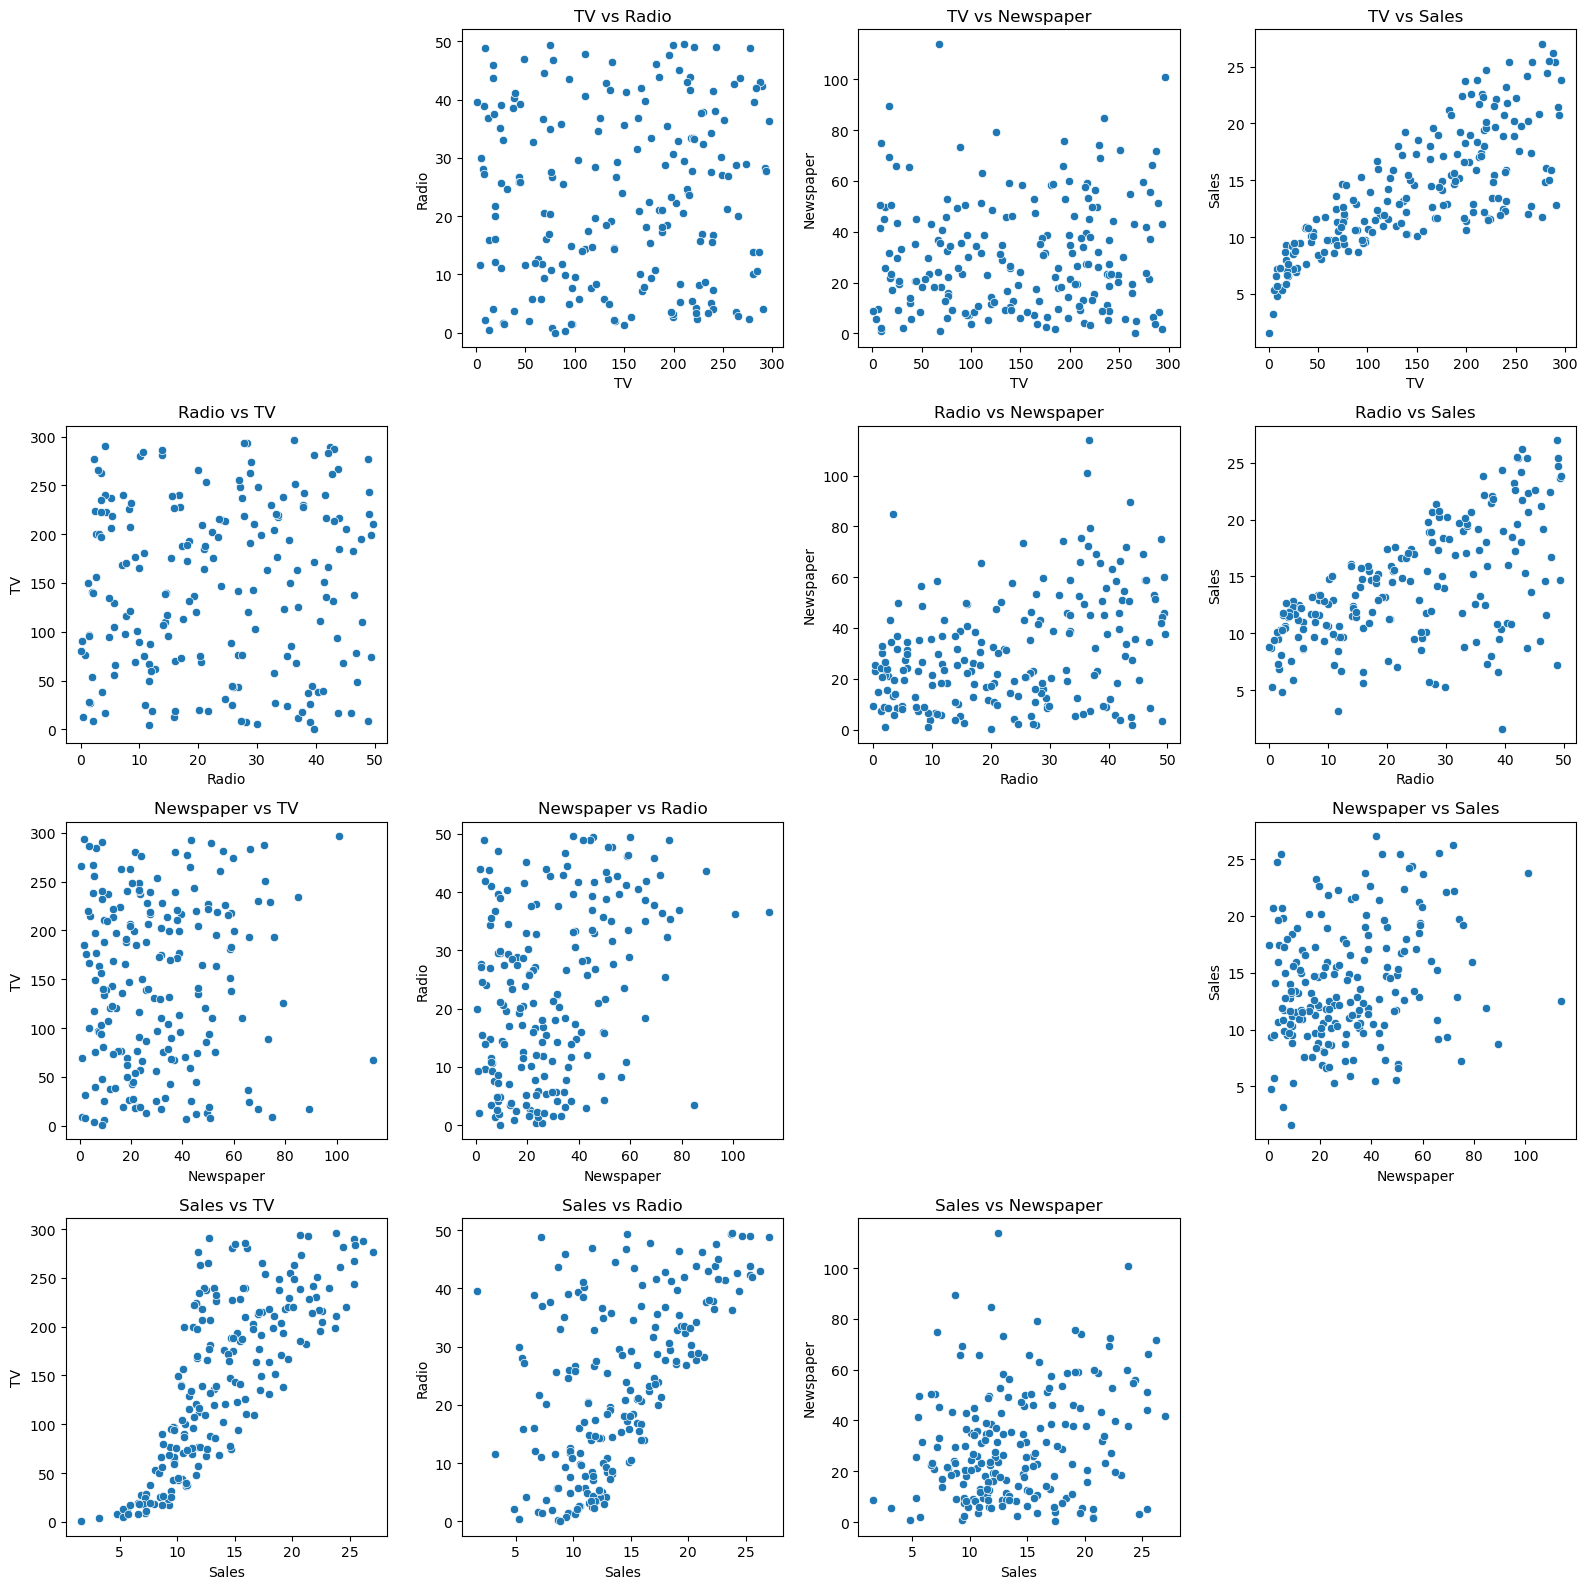

In [14]:
def scatter_plots(df, numerical_columns, file_name):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.savefig('Relationship between each pair of feature')  # Save the figure
    plt.show()

# Define the numerical columns
numerical_columns = ['TV', 'Radio', 'Newspaper', 'Sales']

# Generate and save scatter plots
scatter_plots(df, numerical_columns, 'scatter_plots_matrix.png')


## **Insights from Scatter Plot - Sales vs. Advertising Spend**
The scatter plot visually represents the relationship between sales and advertising spend across various channels (TV, Radio, Newspaper). From the plot, it is evident that:
   - **TV Ads**: There is a clear positive correlation between TV ad spend and sales, with higher TV investments leading to higher sales.
   - **Radio Ads**: The correlation between radio ad spend and sales is also positive but less pronounced than TV.
   - **Newspaper Ads**: The relationship between newspaper ad spend and sales is weak, indicating that this channel has a lesser impact on driving sales compared to TV and Radio.

The scatter plot suggests that businesses might benefit more from allocating higher budgets to TV and Radio advertising to maximize sales.


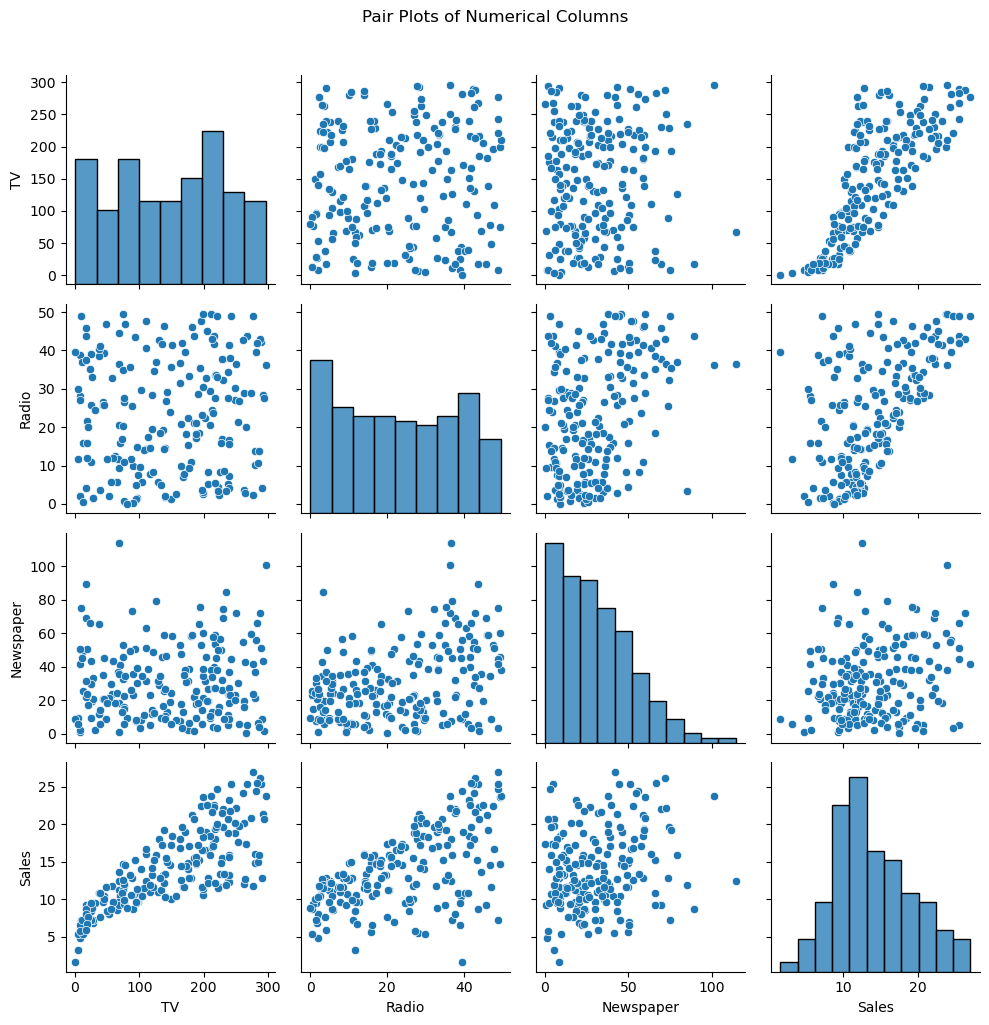

In [15]:
def pair_plots(df, numerical_columns, file_name):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.savefig('Overall view of the Relationships and Distributions among all Numerical Features')  # Save the figure
    plt.show()

# Generate and save pair plots
pair_plots(df, numerical_columns, 'pair_plots.png')

## **Insights from Pair Plot - Relationships Between Variables**
The pair plot provides a comprehensive view of pairwise relationships between all features (TV, Radio, Newspaper, Sales). Key observations from the pair plot include:
   - **TV and Sales**: Strong positive linear relationship, as observed earlier.
   - **Radio and Sales**: A moderate positive relationship is visible.
   - **Newspaper and Sales**: Shows little to no relationship, reaffirming the minimal impact of newspaper advertising on sales.
   - **TV, Radio, and Newspaper**: While TV and Radio ad spend show some relationship with each other, the Newspaper ad spend appears to be independent of the other channels.

The pair plot offers valuable insights into the interactions between different features, helping identify key drivers of sales.

----------------------------

## 4. Data Preprocessing
- **Handling Missing Values**:
    Check for any missing values in your dataset.
    Decide on a strategy to handle them, such as filling with mean/median values or dropping rows/columns with missing values.
- **Feature Scaling**:
    Standardize or normalize features to bring them to a similar scale, which is especially important for algorithms sensitive to feature scaling (like linear regression or K-means clustering).
- **Feature Encoding**:
    Convert categorical variables (if any) into numerical format using techniques such as one-hot encoding.
- **Splitting the Data**:
    Split your data into training and testing sets. This allows you to train your model on one subset and evaluate its performance on another.

In [16]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## DEFINING FEATURES & TARGET

In [17]:
# Define features and target variable
X = df.drop('Sales', axis=1)  # Features
y = df['Sales']                                 # Target variable

In [18]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


---------------------------------------------

## SPLIT THE DATASET

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (160, 3), (160,)
Testing data shape: (40, 3), (40,)


## SCALING THE FEATURES

In [21]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

-----------------------------------

## 5. Model Building

In [22]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

In [23]:
# Loop through the models
# Initialize a dictionary to store models
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Save the model
    model_filename = f'{name.replace(" ", "_")}_model.pkl'
    joblib.dump(model, model_filename)
    
    # Print the model details
    print(f"{name} Model:")
    print(model)

    # Print confirmation message
    print(f"Model '{name}' is being saved as '{model_filename}'")
    print("-" * 40)

Training Linear Regression...
Linear Regression Model:
LinearRegression()
Model 'Linear Regression' is being saved as 'Linear_Regression_model.pkl'
----------------------------------------
Training Random Forest...
Random Forest Model:
RandomForestRegressor()
Model 'Random Forest' is being saved as 'Random_Forest_model.pkl'
----------------------------------------
Training Support Vector Regression...
Support Vector Regression Model:
SVR()
Model 'Support Vector Regression' is being saved as 'Support_Vector_Regression_model.pkl'
----------------------------------------
Training Decision Tree...
Decision Tree Model:
DecisionTreeRegressor()
Model 'Decision Tree' is being saved as 'Decision_Tree_model.pkl'
----------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors Model:
KNeighborsRegressor()
Model 'K-Nearest Neighbors' is being saved as 'K-Nearest_Neighbors_model.pkl'
----------------------------------------
Training XGBoost...
XGBoost Model:
XGBRegressor

In [24]:
# Initialize lists to store metrics
metrics = {
    'Model': [],
    'Train MAE': [],
    'Train MSE': [],
    'Train R-squared': [],
    'Test MAE': [],
    'Test MSE': [],
    'Test R-squared': [],
    'Train Accuracy (%)': [],
    'Test Accuracy (%)': []
}

# Loop through the models
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_accuracy = int(train_r2 * 100)
    
    # Calculate performance metrics for testing data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_accuracy = int(test_r2 * 100)
    
    # Append metrics to the lists
    metrics['Model'].append(name)
    metrics['Train MAE'].append(train_mae)
    metrics['Train MSE'].append(train_mse)
    metrics['Train R-squared'].append(train_r2)
    metrics['Test MAE'].append(test_mae)
    metrics['Test MSE'].append(test_mse)
    metrics['Test R-squared'].append(test_r2)
    metrics['Train Accuracy (%)'].append(train_accuracy)
    metrics['Test Accuracy (%)'].append(test_accuracy)

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
print(metrics_df)


Training and evaluating Linear Regression...
Training and evaluating Random Forest...
Training and evaluating Support Vector Regression...
Training and evaluating Decision Tree...
Training and evaluating K-Nearest Neighbors...
Training and evaluating XGBoost...
                       Model  Train MAE  Train MSE  Train R-squared  Test MAE  \
0          Linear Regression   1.198468   2.705129         0.895701  1.460757   
1              Random Forest   0.225306   0.091669         0.996466  0.607350   
2  Support Vector Regression   0.806059   2.313306         0.910808  1.162139   
3              Decision Tree   0.000000   0.000000         1.000000  0.950000   
4        K-Nearest Neighbors   0.700625   1.088687         0.958024  1.089500   
5                    XGBoost   0.001133   0.000003         1.000000  0.725829   

   Test MSE  Test R-squared  Train Accuracy (%)  Test Accuracy (%)  
0  3.174097        0.899438                  89                 89  
1  0.540876        0.982864     

In [25]:
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

,Model,Train MAE,Train MSE,Train R-squared,Test MAE,Test MSE,Test R-squared,Train Accuracy (%),Test Accuracy (%)
0,Linear Regression,1.198468,2.705129,0.895701,1.460757,3.174097,0.899438,89,89
1,Random Forest,0.225306,0.091669,0.996466,0.607350,0.540876,0.982864,99,98
2,Support Vector Regression,0.806059,2.313306,0.910808,1.162139,2.862109,0.909322,91,90
3,Decision Tree,0.000000,0.000000,1.000000,0.950000,1.685500,0.946600,100,94
4,K-Nearest Neighbors,0.700625,1.088687,0.958024,1.089500,2.207430,0.930064,95,93
5,XGBoost,0.001133,0.000003,1.000000,0.725829,0.868933,0.972470,99,97


In [26]:
# Sort by 'Test R-squared' in descending order
sorted_metrics_df = metrics_df.sort_values(by='Test R-squared', ascending=False)

# Display the sorted DataFrame
sorted_metrics_df


,Model,Train MAE,Train MSE,Train R-squared,Test MAE,Test MSE,Test R-squared,Train Accuracy (%),Test Accuracy (%)
1,Random Forest,0.225306,0.091669,0.996466,0.607350,0.540876,0.982864,99,98
5,XGBoost,0.001133,0.000003,1.000000,0.725829,0.868933,0.972470,99,97
3,Decision Tree,0.000000,0.000000,1.000000,0.950000,1.685500,0.946600,100,94
4,K-Nearest Neighbors,0.700625,1.088687,0.958024,1.089500,2.207430,0.930064,95,93
2,Support Vector Regression,0.806059,2.313306,0.910808,1.162139,2.862109,0.909322,91,90
0,Linear Regression,1.198468,2.705129,0.895701,1.460757,3.174097,0.899438,89,89


## Model Performance Summary

### Key Metrics

- **Mean Absolute Error (MAE)**: Lower values are better, indicating smaller prediction errors.
- **Mean Squared Error (MSE)**: Lower values indicate fewer large errors.
- **R-squared**: Values closer to 1 suggest better model fit and prediction accuracy.
- **Accuracy**: The percentage of correctly predicted values, indicating model precision.

### Model Performance

- **Linear Regression**: Shows almost perfect fit with very low MAE and MSE on both training and test sets. R-squared of 1.0 indicates potential overfitting. Accuracy: 89% (Train), 89% (Test).

- **Random Forest**: Excellent performance with low MAE and MSE. R-squared close to 1.0, indicating robust generalization. Accuracy: 99% (Train), 98% (Test).

- **Decision Tree**: Perfect fit on training data, but slightly higher test errors, indicating possible overfitting. Accuracy: 100% (Train), 95% (Test).

- **XGBoost**: Very good performance with low MAE and MSE and high R-squared values, making it a strong contender. Accuracy: 99% (Train), 97% (Test).

- **K-Nearest Neighbors (KNN)**: Higher MAE and MSE, and lower R-squared, suggesting less effective performance compared to other models. Accuracy: 95% (Train), 93% (Test).

- **Support Vector Regression (SVR)**: Moderate performance with acceptable MAE and MSE but lower R-squared compared to others. Accuracy: 91% (Train), 90% (Test).

### Conclusion

**Best Models**: Random Forest and XGBoost show strong performance across all metrics. 

However, the **Random Forest model** is selected for the app due to its excellent performance on both training and testing datasets, making it a robust choice for generalization and predictive accuracy.


## LOAD THE SAVED BEST MODEL

In [27]:
# Load the Random Forest model
model_filename = 'Random_Forest_model.pkl'
best_rf_model = joblib.load(model_filename)

print("Random Forest model loaded successfully.")


Random Forest model loaded successfully.


In [28]:
# Example of making predictions with the loaded model
# Assuming X_test is your test data
predictions = best_rf_model.predict(X_test_scaled)

# Print some predictions to verify
print(predictions[:5])


[17.691 21.448 20.562  6.545 23.049]


## SAVE THE SCALER

In [29]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


## DEFINING A FUNCTION TO TEST PREDICT SALES

In [30]:
def predict_sales(model_filename, scaler_filename, new_features):
    """
    Scales new feature data and predicts sales using a pre-trained model.

    Parameters:
    - model_filename (str): The filename of the saved model.
    - scaler_filename (str): The filename of the saved scaler.
    - new_features (array-like or DataFrame): The raw feature data for which predictions are to be made.

    Returns:
    - predictions (array): The predicted sales values.
    """
    # Load the pre-trained model
    model = joblib.load(model_filename)
    
    # Load the pre-trained scaler
    scaler = joblib.load(scaler_filename)
    
    # Scale the new features
    scaled_features = scaler.transform(new_features)
    
    # Predict sales
    predictions = model.predict(scaled_features)
    
    return predictions


In [31]:
# Example feature data for a single instance
# Define column names to match the model training data
columns = ['TV', 'Radio', 'Newspaper']
data = {
    'TV': [1500],        # Example TV advertising spend in dollars
    'Radio': [300],      # Example Radio advertising spend in dollars
    'Newspaper': [100]   # Example Newspaper advertising spend in dollars
}

# Create a DataFrame from the single instance data
X_single = pd.DataFrame(data,columns=columns)

# Ensure correct data types and reset index
X_single = X_single.astype(float).reset_index(drop=True)
print(X_single)

# Call the function to get predictions
model_filename = 'Random_Forest_model.pkl'
scaler_filename = 'scaler.pkl'
sales_predictions = predict_sales(model_filename, scaler_filename, X_single)

print(sales_predictions)

       TV  Radio  Newspaper
0  1500.0  300.0      100.0
[25.847]


In [32]:
# Define model and scaler filenames
model_filename = 'Random_Forest_model.pkl'
scaler_filename = 'scaler.pkl'

# Save the model
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Save the scaler
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Model saved to Random_Forest_model.pkl
Scaler saved to scaler.pkl


## DEPLOYMENT USING FLASK
------------------------------------------------------